## **PetCat EDA**
Author: Tzu-Chun Chen
Team2: Angela Liou, Wen-Hsin Kung, Tzu-Chun Chen

### Data Source : https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-01-31

### **External Source**
1. Research that combined GPS tracking and prey-capture reports from nearly a thousand pet cats across multiple countries showed that although most cats remain close to home, their predation can be highly concentrated locally. This supports the idea that spatial behavior and local movement patterns are key to understanding ecological impact. https://news.ncsu.edu/2020/03/domestic-cat-effects/
2. Global conservation literature indicates that free-roaming, feral, and outdoor domestic cats pose a broad threat to biodiversity through predation, competition, and other ecological pressures, contributing to species declines and extinctions, particularly in island ecosystems. https://wildlife.org/tws-issue-statement-feral-and-free-ranging-domestic-cats/
3. A major systematic review estimated that free-ranging domestic cats are responsible for vast numbers of wildlife deaths in the United States, killing billions of birds and mammals each year—making them a substantial source of anthropogenic wildlife mortality. This study emphasizes the scale of predation by outdoor cats in a continental context. https://www.nature.com/articles/ncomms2380

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
url_cats = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-31/cats_uk.csv'
url_ref = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-31/cats_uk_reference.csv'

df_cats = pd.read_csv(url_cats)
df_ref = pd.read_csv(url_ref)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

display(df_cats.head())

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,study_name
0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,Pet Cats United Kingdom
1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,Pet Cats United Kingdom
2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,Pet Cats United Kingdom
3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,Pet Cats United Kingdom
4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,Pet Cats United Kingdom


In [ ]:
display(df_ref.head())

,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Tommy-Tag,Tommy,Felis catus,2017-06-03T01:02:09Z,2017-06-10T02:10:52Z,True,12.5,Neutered,m,12.5,2,True,True,False,UK,11.0
1,Athena,Athena,Felis catus,2017-06-24T01:02:13Z,2017-06-30T23:59:32Z,True,3.0,Spayed,f,7.5,2,True,True,False,UK,3.0
2,Ares,Ares,Felis catus,2017-06-24T01:03:57Z,2017-06-30T23:58:01Z,NaN,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,Lola,Lola,Felis catus,2017-06-24T01:18:49Z,2017-06-30T09:04:40Z,True,3.0,Spayed,f,17.5,1,True,True,False,UK,10.0
4,Maverick,Maverick,Felis catus,2017-06-25T01:04:35Z,2017-07-03T09:10:07Z,True,3.0,Neutered,m,12.5,1,True,True,True,UK,7.0


In [ ]:
print(df_cats.shape, df_ref.shape)

(18215, 11) (101, 16)


In [ ]:
display(df_cats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tag_id                    18215 non-null  object 
 1   event_id                  18215 non-null  int64  
 2   visible                   18215 non-null  bool   
 3   timestamp                 18215 non-null  object 
 4   location_long             18215 non-null  float64
 5   location_lat              18215 non-null  float64
 6   ground_speed              18215 non-null  int64  
 7   height_above_ellipsoid    18215 non-null  float64
 8   algorithm_marked_outlier  18215 non-null  bool   
 9   manually_marked_outlier   18215 non-null  bool   
 10  study_name                18215 non-null  object 
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 1.2+ MB


None

In [ ]:
display(df_ref.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tag_id                         101 non-null    object 
 1   animal_id                      101 non-null    object 
 2   animal_taxon                   101 non-null    object 
 3   deploy_on_date                 101 non-null    object 
 4   deploy_off_date                101 non-null    object 
 5   hunt                           92 non-null     object 
 6   prey_p_month                   101 non-null    float64
 7   animal_reproductive_condition  98 non-null     object 
 8   animal_sex                     101 non-null    object 
 9   hrs_indoors                    101 non-null    float64
 10  n_cats                         101 non-null    int64  
 11  food_dry                       101 non-null    bool   
 12  food_wet                       101 non-null    boo

None

In [ ]:
display(df_cats.describe())

,event_id,location_long,location_lat,ground_speed,height_above_ellipsoid
count,1.821500e+04,18215.000000,18215.000000,18215.000000,18215.000000
mean,3.618912e+09,-4.988242,50.296238,1911.484381,103.648265
std,1.934048e+08,0.301499,0.158353,4592.574178,245.705665
min,3.395611e+09,-5.758854,50.103519,0.000000,-550.070000
25%,3.459216e+09,-5.157051,50.153644,396.000000,48.870000
50%,3.544858e+09,-5.073365,50.236397,1080.000000,80.920000
75%,3.716220e+09,-4.795648,50.428098,2232.000000,119.430000
max,4.149498e+09,-4.208614,50.882217,277092.000000,8388.260000


In [ ]:
display(df_ref.describe())

,prey_p_month,hrs_indoors,n_cats,age_years
count,101.000000,101.000000,101.000000,100.000000
mean,3.742574,11.856436,2.079208,5.420000
std,4.831467,5.227971,0.996827,3.384994
min,0.000000,2.500000,1.000000,0.000000
25%,0.500000,7.500000,1.000000,3.000000
50%,3.000000,12.500000,2.000000,5.000000
75%,3.000000,17.500000,3.000000,8.000000
max,17.500000,22.500000,4.000000,16.000000


In [ ]:
print(df_ref['animal_sex'].value_counts())

animal_sex
m    57
f    44
Name: count, dtype: int64


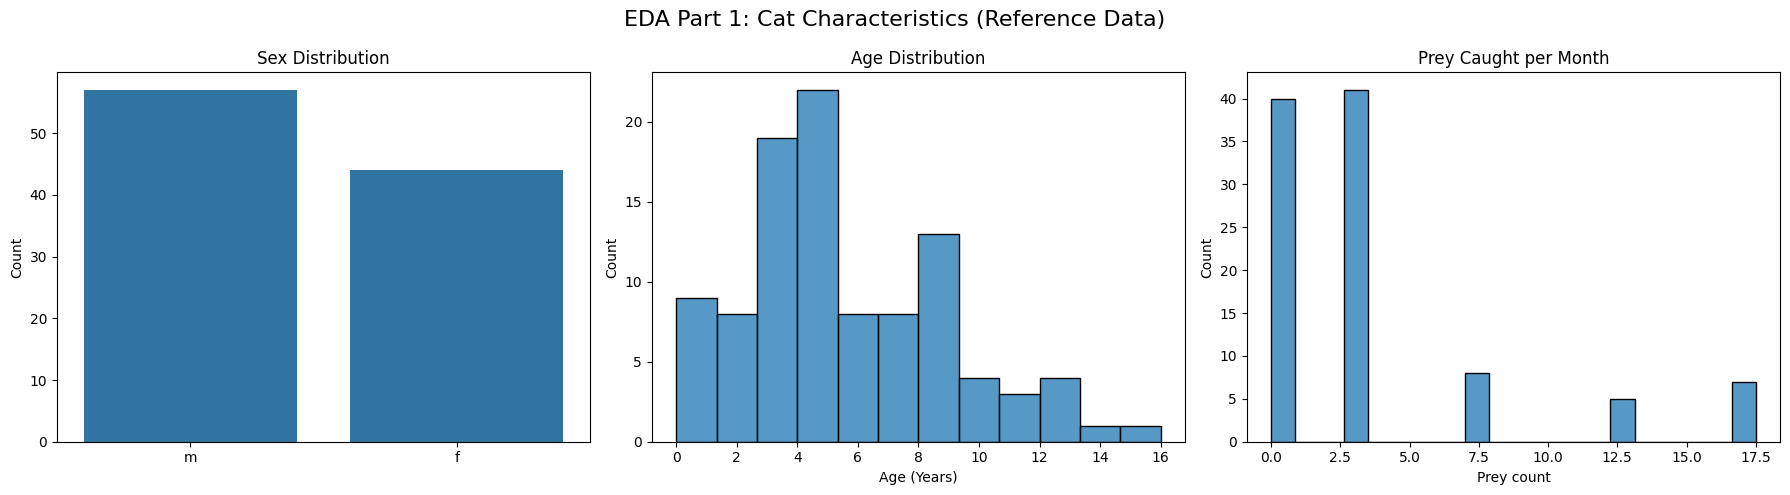

=== Summary: Reference Data ===
Total Cats (unique tag_id): 101
        age_years  prey_p_month
count  100.000000    101.000000
mean     5.420000      3.742574
std      3.384994      4.831467
min      0.000000      0.000000
25%      3.000000      0.500000
50%      5.000000      3.000000
75%      8.000000      3.000000
max     16.000000     17.500000


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sex distribution
sex_counts = df_ref["animal_sex"].fillna("Unknown").value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, ax=axes[0])
axes[0].set_title("Sex Distribution")
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")

# Age
sns.histplot(df_ref["age_years"].dropna(), bins=12, ax=axes[1])
axes[1].set_title("Age Distribution")
axes[1].set_xlabel("Age (Years)")

# Prey per month
sns.histplot(df_ref["prey_p_month"].dropna(), bins=20, ax=axes[2])
axes[2].set_title("Prey Caught per Month")
axes[2].set_xlabel("Prey count")

plt.suptitle("EDA Part 1: Cat Characteristics (Reference Data)", fontsize=16)
plt.tight_layout()
plt.show()

print("=== Summary: Reference Data ===")
print(f"Total Cats (unique tag_id): {df_ref['tag_id'].nunique()}")
print(df_ref[["age_years", "prey_p_month"]].describe())


Preliminary EDA: Reference Data The reference dataset includes 101 uniquely tagged domestic cats. The sample is relatively balanced by sex, with slightly more males (57) than females (44). Most cats are middle-aged, with an average age of 5.4 years (std: 3.4), though the population ranges from kittens (<1 year) to seniors (16 years).

In contrast, hunting behavior exhibits substantial heterogeneity. While the median prey count is low (3.0 per month), a small number of individuals account for disproportionately high prey counts (max: 17.5), resulting in a highly right-skewed distribution. This pattern suggests that ecological impacts may be driven by a specific subset of "super-hunters" rather than by the average cat, a distinction that validates the need for clustering analysis.

In [ ]:
print("Total GPS records:", len(df_cats))
print("Unique cats:", df_cats["tag_id"].nunique())

df_cats[["tag_id", "timestamp", "ground_speed"]].head()


Total GPS records: 18215
Unique cats: 101


,tag_id,timestamp,ground_speed
0,Ares,2017-06-24T01:03:57Z,684
1,Ares,2017-06-24T01:11:20Z,936
2,Ares,2017-06-24T02:58:16Z,2340
3,Ares,2017-06-24T03:01:26Z,0
4,Ares,2017-06-24T03:51:58Z,4896


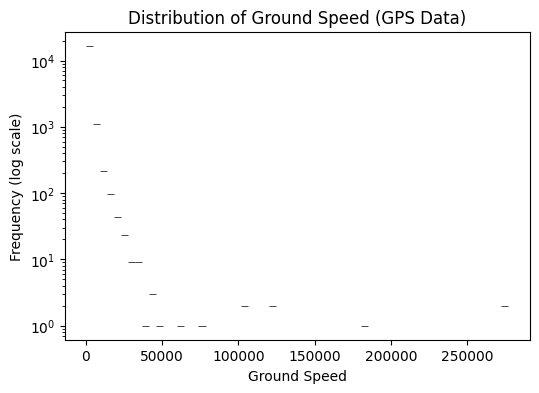

,ground_speed
count,18215.000000
mean,1911.484381
std,4592.574178
min,0.000000
25%,396.000000
50%,1080.000000
75%,2232.000000
max,277092.000000


In [ ]:
speed = df_cats["ground_speed"].dropna()

plt.figure(figsize=(6,4))
sns.histplot(
    speed,
    bins=60,
    log_scale=(False, True)
)
plt.xlabel("Ground Speed")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Ground Speed (GPS Data)")
plt.show()

speed.describe()


### Extreme values are present in the raw GPS ground speed data.
Exploratory analysis shows a highly right-skewed distribution, with most observations concentrated at low speeds and a small number of extremely large values (maximum exceeding 270,000). These extreme observations dominate the scale of the distribution and obscure patterns among typical movements. To improve interpretability and focus on meaningful behavioral variation, subsequent analyses apply log scaling and exclude the most extreme observations above the 99.5th percentile. This approach preserves the majority of the data while reducing the influence of implausible or noise-driven values.

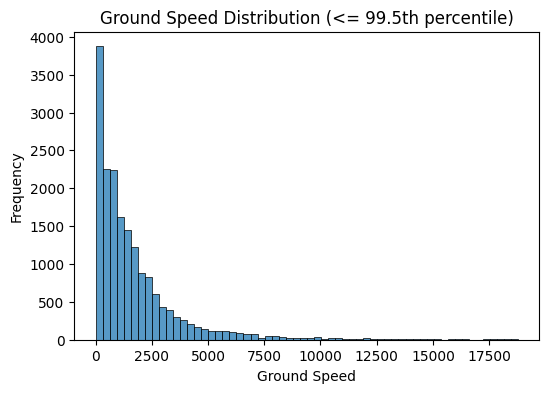

np.float64(18825.48000000001)

In [ ]:
speed = df_cats["ground_speed"].dropna()

upper = speed.quantile(0.995)
speed_trim = speed[speed <= upper]

plt.figure(figsize=(6,4))
sns.histplot(
    speed_trim,
    bins=60,
)
plt.xlabel("Ground Speed")
plt.ylabel("Frequency")
plt.title("Ground Speed Distribution (<= 99.5th percentile)")
plt.show()

upper


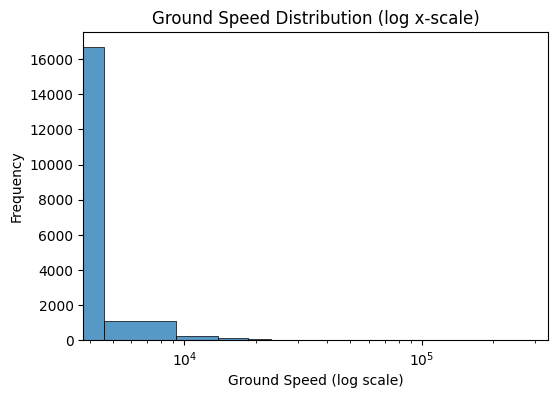

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(
    speed,
    bins=60,
)
plt.xscale("log")
plt.xlabel("Ground Speed (log scale)")
plt.ylabel("Frequency")
plt.title("Ground Speed Distribution (log x-scale)")
plt.show()


Cat movement is dominated by low-speed activity, with occasional bursts of high-speed movement, resulting in a highly right-skewed distribution.

In [ ]:
p999 = speed.quantile(0.999)
p995 = speed.quantile(0.995)

p995, p999


(np.float64(18825.48000000001), np.float64(33012.0))

In [ ]:
outliers = df_cats[df_cats["ground_speed"] > p999]
len(outliers)

18

A small fraction of GPS records exhibit extremely high speeds, which may reflect rare bursts of movement or potential measurement noise, suggesting the need for robust aggregation at the individual level.

Speed variability is measured as the standard deviation of ground speed across all GPS observations for each cat, capturing the extent to which individual movement behavior fluctuates over time.

In [ ]:
cat_movement_profile = (
    df_cats
    .groupby("tag_id")
    .agg(
        avg_speed=("ground_speed", "mean"),
        max_speed=("ground_speed", "max"),
        sd_speed=("ground_speed", "std"),
        n_records=("ground_speed", "count")
    )
    .reset_index()
)

cat_movement_profile.head()


,tag_id,avg_speed,max_speed,sd_speed,n_records
0,Abba-Tag,1603.951807,13968,2149.160017,83
1,Alfie-Tag,1931.679144,14652,2413.262206,187
2,Amber-Tag,1967.614679,21888,2602.831283,218
3,Ares,2285.825243,14328,2636.692508,103
4,Athena,2134.188679,19728,2685.603928,106


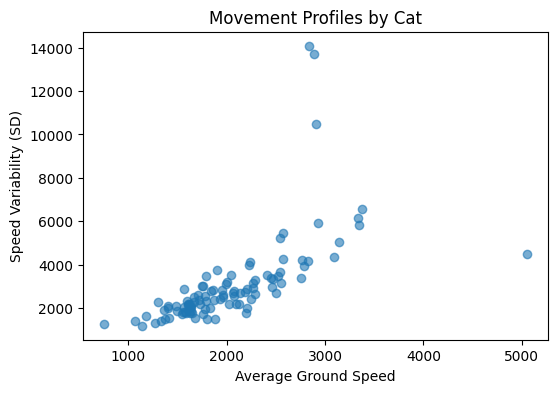

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    cat_movement_profile["avg_speed"],
    cat_movement_profile["sd_speed"],
    alpha=0.6,
)
plt.xlabel("Average Ground Speed")
plt.ylabel("Speed Variability (SD)")
plt.title("Movement Profiles by Cat")
plt.show()


### **Insights :** Aggregating GPS records at the individual level reveals substantial heterogeneity in movement behavior across cats. While most cats exhibit relatively low average speeds with modest variability, a subset of individuals displays pronounced speed fluctuations, indicating occasional bursts of high-intensity movement. Additionally, a small number of cats combine both high average speed and high variability, suggesting consistently active movement profiles. The presence of these distinct behavioral patterns supports the use of unsupervised methods to identify meaningful movement-based segments.

### **Inspired Question :** Are cats more similar to each other in movement behavior when they share similar movement profiles (average speed and variability), rather than when they share demographic characteristics such as age or sex?

### If cats with similar average speed and speed variability cluster together despite differences in age or sex, this would indicate that movement behavior is a more informative dimension for characterizing activity patterns than basic demographics.

###To examine relationships between movement behavior and hunting activity, GPS-derived movement metrics were aggregated at the individual level and merged with reference data using unique tag identifiers.

In [ ]:
cat_full = (
    cat_movement_profile
    .merge(
        df_ref[["tag_id", "age_years", "animal_sex", "prey_p_month"]],
        on="tag_id",
        how="inner"
    )
)


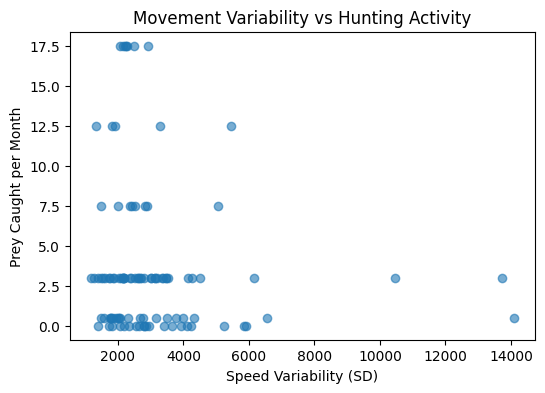

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    cat_full["sd_speed"],
    cat_full["prey_p_month"],
    alpha=0.6,
)
plt.xlabel("Speed Variability (SD)")
plt.ylabel("Prey Caught per Month")
plt.title("Movement Variability vs Hunting Activity")
plt.show()


### **Insights :** When GPS-derived movement variability is examined alongside hunting activity at the individual level, most cats exhibit both low movement variability and low prey counts. Higher prey counts are observed only among cats with moderate to high speed variability, although high variability alone does not necessarily correspond to increased hunting. This pattern suggests that movement instability may be a contributing factor to hunting behavior, while other factors likely also play a role.

### **Inspired Question :** Are cats more similar in hunting activity when they share similar movement variability, rather than when they share similar average movement speed?

### If cats with higher movement variability exhibit similar hunting intensity regardless of their average speed, while cats with low variability consistently show low prey capture, this would suggest that behavioral instability plays a more important role than overall movement level in shaping hunting outcomes.

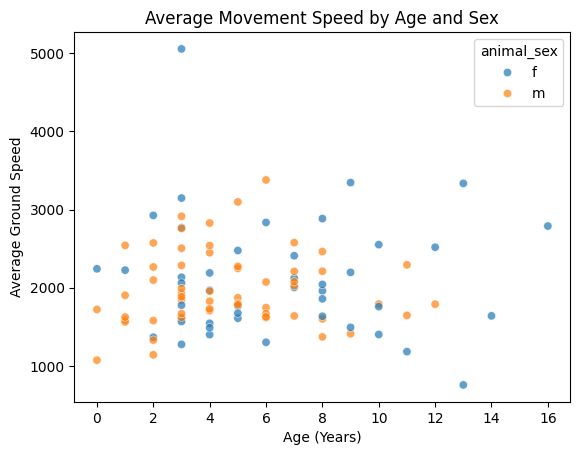

In [ ]:
sns.scatterplot(
    data=cat_full,
    x="age_years",
    y="avg_speed",
    hue="animal_sex",
    alpha=0.7
)
plt.xlabel("Age (Years)")
plt.ylabel("Average Ground Speed")
plt.title("Average Movement Speed by Age and Sex")
plt.show()



### **Insights :** Average movement speed shows substantial overlap across age groups and between sexes. No clear monotonic relationship between age and average speed is evident, and male and female cats exhibit broadly similar distributions. Instead, large variation in average speed is observed within age groups, suggesting that individual-level behavioral differences play a more prominent role than basic demographic factors. These results suggest that basic demographic variables alone are insufficient to explain observed heterogeneity in movement behavior.

### **Inspired Question :** Do cats with similar movement behavior profiles exhibit similar ecological impact even when they differ in age and sex?

### If cats grouped by movement behavior show comparable prey capture rates despite demographic differences, this would imply that individual behavioral patterns dominate over demographic factors in explaining ecological impact.

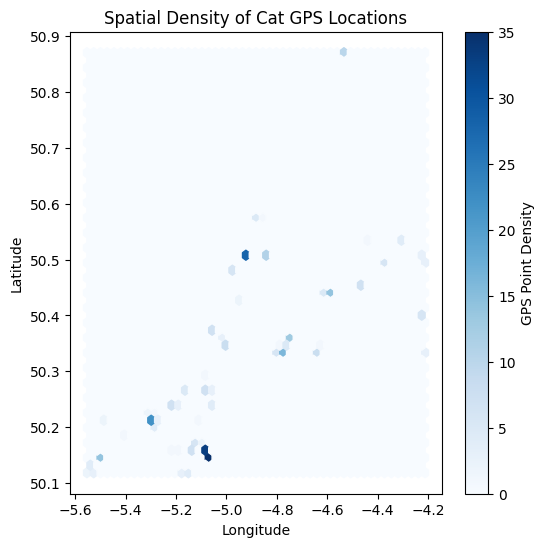

In [ ]:
gps_sample = df_cats.sample(frac=0.02, random_state=42)

plt.figure(figsize=(6,6))
plt.hexbin(
    gps_sample["location_long"],
    gps_sample["location_lat"],
    gridsize=50,
    cmap="Blues"
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Density of Cat GPS Locations")
plt.colorbar(label="GPS Point Density")
plt.show()


### This spatial visualization is intended to illustrate overall concentration patterns rather than precise geographic boundaries.

### **Insights :** The spatial density map of GPS locations shows that cat movements are highly concentrated within limited geographic areas. Most observations cluster tightly around a small number of core locations, indicating restricted home ranges with only occasional excursions. This spatial concentration suggests that differences in ecological impact are more likely driven by variation in movement behavior within these small areas rather than by large differences in spatial extent.

### **Inspired Question :** Given that cats operate within small and concentrated home ranges, are differences in ecological impact driven more by how intensively cats move within these spaces than by how widely they range spatially?

### If cats occupying similarly constrained spatial areas nonetheless differ substantially in movement intensity and hunting activity, this would indicate that ecological impact is shaped primarily by behavioral intensity rather than spatial extent.